In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
def topic_page_authentication(url):
    
    topics_url = url
    response = requests.get(topics_url)
    page_content = response.text
    doc = BeautifulSoup(page_content, 'html.parser')
    return doc

In [16]:
def topicScraper(doc):
    
    # Extract title 
    title_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class':title_class})

    # Extract description
    description_class = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class':description_class})

    # Extract link
    link_class = 'no-underline flex-1 d-flex flex-column'
    topic_link_tags = doc.find_all('a',{'class':link_class})

    #Extract all the topic names
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)

    #Extract the descrition text of the particular topic
    topic_description = []
    for tag in topic_desc_tags:
        topic_description.append(tag.text.strip())

    #Extract the urls of the particular topics
    topic_urls = []
    base_url = "https://github.com"
    for tags in topic_link_tags:
        topic_urls.append(base_url + tags['href'])

    topics_dict = {
    'Title':topic_titles,
    'Description':topic_description,
    'URL':topic_urls
    }

    topics_df = pd.DataFrame(topics_dict)

    return topics_df


In [17]:
def topic_url_extractor(dataframe):
    
    url_lst = []
    for i in range(len(dataframe)):
        topic_url = dataframe['URL'][i]
        url_lst.append(topic_url)
    return url_lst


In [18]:
def parse_star_count(stars_str):
    
    stars_str = stars_str.strip()[6:]
    if stars_str[-1] == 'k':
        stars_str =  float(stars_str[:-1]) * 1000
    return int(stars_str)

In [19]:
def get_repo_info(h3_tags, star_tag):
    base_url = 'https://github.com'
    a_tags = h3_tags.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username, repo_name, stars, repo_url

In [20]:
def topic_information_scraper(topic_url):
    # page authentication
    topic_doc = topic_page_authentication(topic_url)

    # extract name
    h3_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class':h3_class})

    #get sart tag
    star_class = 'tooltipped tooltipped-s btn-sm btn BtnGroup-item color-bg-default'
    star_tags = topic_doc.find_all('a',{'class':star_class})

    #get inforation about the topic
    topic_repos_dict = {
    'username': [],
    'repo_name': [],
    'stars': [],
    'repo_url': []
    }

    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
        
    return pd.DataFrame(topic_repos_dict)



In [21]:
# Create the directory if it doesn't exist
directory = '/kaggle/working/GitHubTopic_CSV-Files'
if not os.path.exists(directory):
    os.makedirs(directory)


In [22]:
# Inside the main block
if __name__ == "__main__":
    url = 'https://github.com/topics'
    print("Fetching topic page...")
    topic_doc = topic_page_authentication(url)
    print("Scraping topics...")
    topic_dataframe = topicScraper(topic_doc)
    print("Cleaning data...")
    topic_dataframe['Title'] = topic_dataframe['Title'].astype(str).str.strip().str.lower()
    topic_dataframe['Description'] = topic_dataframe['Description'].astype(str).str.strip().str.lower()

    # Save the data to CSV
    topic_dataframe.to_csv('/kaggle/working/GitHubtopics.csv', index=None)
    print("Process completed.")

    # Iterate through the topic URLs and save CSV files
    url = topic_url_extractor(topic_dataframe) 
    
    directory = '/kaggle/working/GitHubTopic_CSV-Files'
    name = topic_dataframe['Title']
    url = topic_dataframe['URL']

    for i in range(len(topic_dataframe)):
        new_df = topic_information_scraper(url[i])
        new_df.to_csv(f'GitHubTopic_CSV-Files/{name[i]}.csv', index=None)
        
        # Verify the column names in each CSV file
        print(f"Column names in {name[i]}.csv:")
        print(new_df.columns)


Fetching topic page...
Scraping topics...
Cleaning data...
Process completed.
Column names in 3d.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in ajax.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in algorithm.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in amp.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in android.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in angular.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in ansible.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in api.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in arduino.csv:
Index(['username', 'repo_name', 'stars', 'repo_url'], dtype='object')
Column names in asp.net.csv:
Index(['username

In [23]:
topic_dataframe = pd.read_csv('GitHubtopics.csv')


In [24]:
# Check the first few rows of the DataFrame
print(topic_dataframe.head())

# Get an overview of the DataFrame
print(topic_dataframe.info())

# Check for missing values
print(topic_dataframe.isnull().sum())


       Title                                        Description  \
0         3d  3d refers to the use of three-dimensional grap...   
1       ajax  ajax is a technique for creating interactive w...   
2  algorithm  algorithms are self-contained sequences that c...   
3        amp  amp is a non-blocking concurrency library for ...   
4    android  android is an operating system built by google...   

                                   URL  
0         https://github.com/topics/3d  
1       https://github.com/topics/ajax  
2  https://github.com/topics/algorithm  
3      https://github.com/topics/amphp  
4    https://github.com/topics/android  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        30 non-null     object
 1   Description  30 non-null     object
 2   URL          30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes

First few rows of the DataFrame:
       Title                                        Description  \
0         3d  3d refers to the use of three-dimensional grap...   
1       ajax  ajax is a technique for creating interactive w...   
2  algorithm  algorithms are self-contained sequences that c...   
3        amp  amp is a non-blocking concurrency library for ...   
4    android  android is an operating system built by google...   

                                   URL  
0         https://github.com/topics/3d  
1       https://github.com/topics/ajax  
2  https://github.com/topics/algorithm  
3      https://github.com/topics/amphp  
4    https://github.com/topics/android  

Overview of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        30 non-null     object
 1   Description  30 non-null     object
 2   URL          30 non

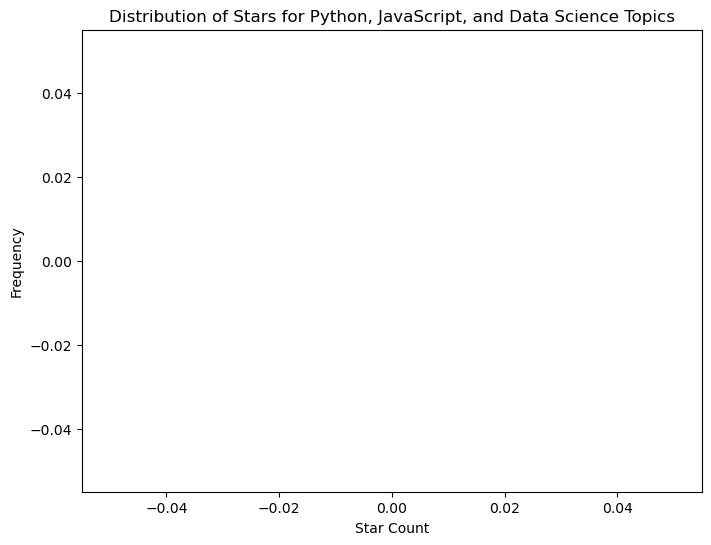

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main topic DataFrame from the CSV file
topic_dataframe = pd.read_csv('/kaggle/working/GitHubtopics.csv')

# Clean the text columns by removing leading/trailing spaces and converting to lowercase
topic_dataframe['Title'] = topic_dataframe['Title'].str.strip().str.lower()
topic_dataframe['Description'] = topic_dataframe['Description'].str.strip().str.lower()

# Create a list of files in the 'GitHubTopic_CSV-Files' directory
directory = '/kaggle/working/GitHubTopic_CSV-Files'
topic_files = os.listdir(directory)

# Merge individual CSV files into a single DataFrame
dfs = []
for file in topic_files:
    df = pd.read_csv(os.path.join(directory, file))
    dfs.append(df)
merged_df = pd.concat(dfs)

# Explore the main topic DataFrame
print("First few rows of the DataFrame:")
print(topic_dataframe.head())

print("\nOverview of the DataFrame:")
print(topic_dataframe.info())

print("\nCheck for missing values:")
print(topic_dataframe.isnull().sum())

# Perform EDA on the main topic DataFrame
print("\nSummary statistics:")
print(topic_dataframe.describe())

# Visualize the distribution of stars for 'python', 'javascript', and 'data science' topics
topics_of_interest = ['python', 'javascript', 'data science']
topics_filtered = merged_df[merged_df['username'].isin(topics_of_interest)]

plt.figure(figsize=(8, 6))
sns.histplot(data=topics_filtered, x='stars', bins=20)
plt.xlabel('Star Count')
plt.ylabel('Frequency')
plt.title('Distribution of Stars for Python, JavaScript, and Data Science Topics')
plt.show()



In [26]:
# Load the main topic DataFrame from the CSV file
topic_dataframe = pd.read_csv('GitHubtopics.csv')

# Clean the text columns by removing leading/trailing spaces and converting to lowercase
topic_dataframe['Title'] = topic_dataframe['Title'].str.strip().str.lower()
topic_dataframe['Description'] = topic_dataframe['Description'].str.strip().str.lower()

# Convert the star counts to integers using the correct column name
topic_dataframe['stars'] = topic_dataframe['stars'].apply(parse_star_count)

# Visualize the distribution of stars using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=topic_dataframe, x='stars', bins=20)  # 'stars' with lowercase 's'
plt.xlabel('Star Count')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()

# Explore the relationship between stars and the length of descriptions using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=topic_dataframe, x=topic_dataframe['Description'].str.len(), y='stars')  # 'stars' with lowercase 's'
plt.xlabel('Description Length')
plt.ylabel('Star Count')
plt.title('Relationship between Description Length and Star Count')
plt.show()

# Print the summary statistics and information of the DataFrame
print(topic_dataframe.describe())
print(topic_dataframe.info())

# Explore other CSV files if available
directory = 'GitHubTopic_CSV-Files'
topic_files = os.listdir(directory)

for file in topic_files:
    topic_df = pd.read_csv(os.path.join(directory, file))
    # Perform EDA on the topic DataFrame
    # Example: Visualize the distribution of stars for each topic
    plt.figure(figsize=(8, 6))
    sns.histplot(data=topic_df, x='stars', bins=20)
    plt.xlabel('Star Count')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Stars for {file}')
    plt.show()


KeyError: 'stars'